In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import statsmodels.api as sm

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests,adfuller

In [7]:
#import dataset
filepath = r"C:\Users\Srividya\Downloads\inflation_wage_gnp_dataset.csv"


In [8]:
import pandas as pd

In [9]:
macro_data = pd.read_csv(
    filepath,
    parse_dates=['date'],   # convert 'date' column to datetime
    index_col='date'        # set date as index
)


In [10]:
# Show first rows
print(macro_data.head())

             realgdp  realcons  realinv  realgovt  realdpi    cpi
date                                                             
1959-03-01  2710.349    1707.4  286.898   470.045   1886.9  28.98
1959-06-01  2778.801    1733.7  310.859   481.301   1919.7  29.15
1959-09-01  2775.488    1751.8  289.226   491.260   1916.4  29.35
1959-12-01  2785.204    1753.7  299.356   484.052   1931.3  29.37
1960-03-01  2847.699    1770.5  331.722   462.199   1955.5  29.54


In [11]:
macro_data.tail()

,realgdp,realcons,realinv,realgovt,realdpi,cpi
date,,,,,,
2008-09-01,13324.600,9267.7,1990.693,991.551,9838.3,216.889
2008-12-01,13141.920,9195.3,1857.661,1007.273,9920.4,212.174
2009-03-01,12925.410,9209.2,1558.494,996.287,9926.4,212.671
2009-06-01,12901.504,9189.0,1456.678,1023.528,10077.5,214.469
2009-09-01,12990.341,9256.0,1486.398,1044.088,10040.6,216.385


In [12]:
macro_data.shape

(203, 6)

In [13]:
macro_data.describe()

,realgdp,realcons,realinv,realgovt,realdpi,cpi
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788
std,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878
min,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000
25%,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000
50%,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000
75%,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000
max,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000


In [14]:
macro_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-01 to 2009-09-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   realgdp   203 non-null    float64
 1   realcons  203 non-null    float64
 2   realinv   203 non-null    float64
 3   realgovt  203 non-null    float64
 4   realdpi   203 non-null    float64
 5   cpi       203 non-null    float64
dtypes: float64(6)
memory usage: 11.1 KB


In [15]:
macro_data.isna().sum()

realgdp     0
realcons    0
realinv     0
realgovt    0
realdpi     0
cpi         0
dtype: int64

In [16]:
#before passegner was univariate dataset its easy to plot but this is multivariate dataset so we cant plot 8 times 8 plots

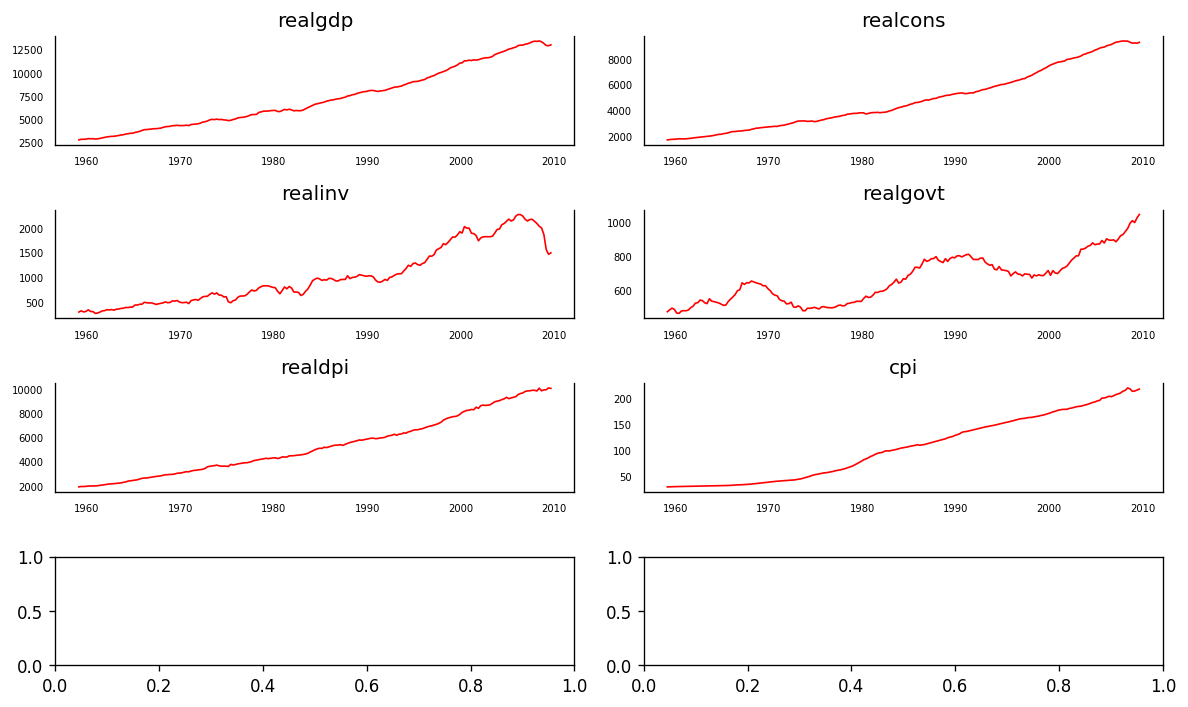

In [20]:
# Visualizing the plot
# Instead of writing code separately for each plot,
# we use a for loop to repeat the same code for all variables.

fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10, 6))

for i, ax in zip(range(len(macro_data.columns)), axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    
    ax.plot(data, color='red', linewidth=1)

    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()


In [21]:
#VAR model may use 2 or 8 variables but the procedure is same for both in above plots too

Considering only two variables rgnp and ulc for time being to understand the VAR model

In [22]:
#check for stationarity
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series):
    result = adfuller(series)
    labels = ['ADF Test statistic', 'P-value', '# Lags Used', '# Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")


In [27]:
adfuller_test(macro_data['realgdp'])

ADF Test statistic: 1.7504627967647182
P-value: 0.9982455372335032
# Lags Used: 12
# Observations Used: 190
The data is not stationary


In [25]:
adfuller_test(macro_data['cpi'])

ADF Test statistic: 0.7307949687843721
P-value: 0.9904328188337421
# Lags Used: 12
# Observations Used: 190
The data is not stationary


In [28]:
#differencing the data to make it stationary
macro_data['rgnp_diff1'] = macro_data['realgdp'].diff(periods=1)


In [29]:
macro_data['rgnp_diff1'] 

date
1959-03-01        NaN
1959-06-01     68.452
1959-09-01     -3.313
1959-12-01      9.716
1960-03-01     62.495
               ...   
2008-09-01    -90.666
2008-12-01   -182.680
2009-03-01   -216.510
2009-06-01    -23.906
2009-09-01     88.837
Name: rgnp_diff1, Length: 203, dtype: float64

In [30]:
adfuller_test(macro_data['rgnp_diff1'] .dropna())

ADF Test statistic: -6.305695561658105
P-value: 3.327882187668224e-08
# Lags Used: 1
# Observations Used: 200
The data is stationary


In [31]:
#differencing the data to make it stationary
macro_data['cpi_diff1'] = macro_data['cpi'].diff(periods=1)

In [32]:
adfuller_test(macro_data['cpi_diff1'] .dropna())

ADF Test statistic: -2.7955044135429525
P-value: 0.058918805578861436
# Lags Used: 11
# Observations Used: 190
The data is not stationary


In [33]:
#difference it again 
macro_data['cpi_diff2'] = macro_data['cpi_diff1'].diff(periods=1)

In [34]:
adfuller_test(macro_data['cpi_diff2'] .dropna())

ADF Test statistic: -4.667502260097812
P-value: 9.681247949115797e-05
# Lags Used: 10
# Observations Used: 190
The data is stationary


In [39]:
#both variables become stationary 
#grangers casuality used for testing dependency or corrrelation
help(grangercausalitytests)


Help on function grangercausalitytests in module statsmodels.tsa.stattools:

grangercausalitytests(x, maxlag, addconst=True, verbose=None)
    Four tests for granger non causality of 2 time series.
    
    All four tests give similar results. `params_ftest` and `ssr_ftest` are
    equivalent based on F test which is identical to lmtest:grangertest in R.
    
    Parameters
    ----------
    x : array_like
        The data for testing whether the time series in the second column Granger
        causes the time series in the first column. Missing values are not
        supported.
    maxlag : {int, Iterable[int]}
        If an integer, computes the test for all lags up to maxlag. If an
        iterable, computes the tests only for the lags in maxlag.
    addconst : bool
        Include a constant in the model.
    verbose : bool
        Print results. Deprecated
    
        .. deprecated: 0.14
    
           verbose is deprecated and will be removed after 0.15 is released
    
    
 

In [40]:
#data=sm.datasets.macrodata.load_pandas()
#data=data.data[['realgdp','realcons']].pct_chane().dropna()

In [44]:
adfuller_test(macro_data['realinv'])

ADF Test statistic: -1.2572522246532605
P-value: 0.6484956579101142
# Lags Used: 3
# Observations Used: 199
The data is not stationary


In [45]:
#differencing the data to make it stationary
macro_data['realinv_diff1'] = macro_data['realinv'].diff(periods=1)

In [46]:
adfuller_test(macro_data['realinv_diff1'] .dropna())

ADF Test statistic: -5.3505947021183395
P-value: 4.29793280817715e-06
# Lags Used: 2
# Observations Used: 199
The data is stationary


In [47]:
adfuller_test(macro_data['realcons'])

ADF Test statistic: 1.5499123380509636
P-value: 0.9976992503412904
# Lags Used: 4
# Observations Used: 198
The data is not stationary


In [48]:
#differencing the data to make it stationary
macro_data['realcons_diff1'] = macro_data['realcons'].diff(periods=1)

In [49]:
adfuller_test(macro_data['realcons_diff1'] .dropna())

ADF Test statistic: -4.204306080845245
P-value: 0.0006479282158627595
# Lags Used: 3
# Observations Used: 198
The data is stationary


In [50]:
adfuller_test(macro_data['realdpi'])

ADF Test statistic: 2.9860253519546847
P-value: 1.0
# Lags Used: 2
# Observations Used: 200
The data is not stationary


In [51]:
#differencing the data to make it stationary
macro_data['realdpi_diff1'] = macro_data['realdpi'].diff(periods=1)

In [52]:
adfuller_test(macro_data['realdpi_diff1'] .dropna())

ADF Test statistic: -8.864893340673005
P-value: 1.4493606159108354e-14
# Lags Used: 1
# Observations Used: 200
The data is stationary


In [53]:
adfuller_test(macro_data['realgovt'])

ADF Test statistic: -0.03158019676572639
P-value: 0.9558411923961088
# Lags Used: 4
# Observations Used: 198
The data is not stationary


In [54]:
#differencing the data to make it stationary
macro_data['realgovt_diff1'] = macro_data['realgovt'].diff(periods=1)

In [55]:
adfuller_test(macro_data['realgovt'])

ADF Test statistic: -0.03158019676572639
P-value: 0.9558411923961088
# Lags Used: 4
# Observations Used: 198
The data is not stationary


In [56]:
#differencing the data to make it stationary
macro_data['realgovt_diff2'] = macro_data['realgovt_diff1'].diff(periods=1)

In [58]:
adfuller_test(macro_data['realgovt_diff2'].dropna())


ADF Test statistic: -10.484532751417257
P-value: 1.1898115249713251e-18
# Lags Used: 4
# Observations Used: 196
The data is stationary


In [59]:
#now majority of data is stationary after 1 st order differencing itself so lets take d=1

In [60]:
#lets check whether one variable is dependent on another variable or not.lets take two variables
granger_1=grangercausalitytests(macro_data[['realgdp','cpi']],4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1803  , p=0.2786  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=1.1980  , p=0.2737  , df=1
likelihood ratio test: chi2=1.1945  , p=0.2744  , df=1
parameter F test:         F=1.1803  , p=0.2786  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8935  , p=0.4109  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=1.8327  , p=0.4000  , df=2
likelihood ratio test: chi2=1.8244  , p=0.4016  , df=2
parameter F test:         F=0.8935  , p=0.4109  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1337  , p=0.0973  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=6.6331  , p=0.0846  , df=3
likelihood ratio test: chi2=6.5255  , p=0.0887  , df=3
parameter F test:         F=2.1337  , p=0.0973  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.4889  , p=0.0017  

its dependent on 4 th lag only

In [61]:
#now check cpi is dependent on realgdp or not previously we checked vice versa
granger_2=grangercausalitytests(macro_data[['cpi','realgdp']],4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8223  , p=0.3656  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=0.8347  , p=0.3609  , df=1
likelihood ratio test: chi2=0.8330  , p=0.3614  , df=1
parameter F test:         F=0.8223  , p=0.3656  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4089  , p=0.6649  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=0.8387  , p=0.6575  , df=2
likelihood ratio test: chi2=0.8369  , p=0.6581  , df=2
parameter F test:         F=0.4089  , p=0.6649  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4836  , p=0.6940  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=1.5035  , p=0.6815  , df=3
likelihood ratio test: chi2=1.4979  , p=0.6828  , df=3
parameter F test:         F=0.4836  , p=0.6940  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6154  , p=0.6521  

their not dependent

In [62]:
macro_data = macro_data[['realgdp', 'cpi']]
#newdataset with two variables created
macro_data.shape
# (123, 2)


(203, 2)

In [63]:
#Dividing the dataset
train_df = macro_data[: -12]
test_df = macro_data[-12 :]


In [64]:
print(test_df.shape)

(12, 2)


In [65]:
#select no of lags  i.e     p
model = VAR(train_df.diff()[1:])


C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


In [66]:
#Selecting max number of lags (p)=10
sorted_order = model.select_order(maxlags=10)
print(sorted_order.summary())



 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        7.307       7.342       1490.       7.321
1        6.972       7.078       1066.       7.015
2        6.769       6.947       870.9       6.841
3       6.635*      6.883*      761.2*      6.736*
4        6.659       6.978       779.6       6.788
5        6.693       7.083       806.9       6.851
6        6.709       7.171       820.5       6.896
7        6.734       7.266       841.4       6.950
8        6.724       7.327       832.8       6.968
9        6.731       7.405       839.1       7.004
10       6.744       7.489       851.0       7.046
--------------------------------------------------


VAR Order Selection (* highlights the minimums)
Therefore lag p = 3 was selected (written in notes as conclusion).
At lag 3 it selects all the least values in 3rd lag so p=3

In [67]:
#building VAR MODEL WITH P=4
model=VAR(train_df.diff()[1:])
model_fitted=model.fit(3)# value of p
model_fitted.summary()

C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Dec, 2025
Time:                     16:34:27
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    6.82489
Nobs:                     187.000    HQIC:                   6.68101
Log likelihood:          -1132.19    FPE:                    722.746
AIC:                      6.58299    Det(Omega_mle):         671.530
--------------------------------------------------------------------
Results for equation realgdp
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             35.217813         8.269177            4.259           0.000
L1.realgdp         0.257378         0.075405            3.413           0.001
L1.cpi           -10.571423         6.821656           -1.550         

we have 2 equations for both the variables 

In [69]:
#VAR model has AR model
#VARMAX MODEL
var_model=VARMAX(train_df,order=(3,0),enforce_stationarity=True)
fitted_model=var_model.fit(disp=False)
print(fitted_model.summary())                 

C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Statespace Model Results                           
Dep. Variable:     ['realgdp', 'cpi']   No. Observations:                  191
Model:                         VAR(3)   Log Likelihood               -1183.781
                          + intercept   AIC                           2401.562
Date:                Tue, 09 Dec 2025   BIC                           2456.851
Time:                        16:46:04   HQIC                          2423.956
Sample:                    03-01-1959                                         
                         - 09-01-2006                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):            0.38, 11.50   Jarque-Bera (JB):        21.38, 438.82
Prob(Q):                        0.54, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):        1.78, 11.42   Skew:                       0.32, 0.40
Prob(H) (two-sided):            0.02,

In [70]:
# after you set date as index
macro_data = macro_data.asfreq('QS-DEC')    # quarterly, year ending Dec
train_df   = macro_data[:-12]
test_df    = macro_data[-12:]


In [71]:
#ConvergenceWarning: optimization failed to converge
from statsmodels.tsa.statespace.varmax import VARMAX

var_model = VARMAX(train_df, order=(3, 0), enforce_stationarity=True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())


C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Statespace Model Results                           
Dep. Variable:     ['realgdp', 'cpi']   No. Observations:                  191
Model:                         VAR(3)   Log Likelihood               -1183.781
                          + intercept   AIC                           2401.562
Date:                Tue, 09 Dec 2025   BIC                           2456.851
Time:                        16:48:44   HQIC                          2423.956
Sample:                    03-01-1959                                         
                         - 09-01-2006                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):            0.38, 11.50   Jarque-Bera (JB):        21.38, 438.82
Prob(Q):                        0.54, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):        1.78, 11.42   Skew:                       0.32, 0.40
Prob(H) (two-sided):            0.02,

In [72]:
train_diff = train_df.diff().dropna()

var_model = VARMAX(train_diff, order=(3, 0), enforce_stationarity=True)#it does stationarity within itself
fitted_model = var_model.fit(maxiter=500, disp=False)
print(fitted_model.mle_retvals)   # to check converged or not
print(fitted_model.summary())


{'fopt': 6.053431425608647, 'gopt': array([ 1.29042466e-04, -4.09741574e-05, -1.63469238e-06,  5.46475754e-05,
        3.63741037e-05, -5.59667868e-06,  2.10895301e-05,  3.98572730e-05,
       -3.23924887e-05,  4.02913258e-05, -2.75294454e-05, -1.12409104e-04,
       -6.26743102e-06,  5.69722047e-06, -2.69437805e-05,  6.68268108e-05,
       -2.62581068e-05]), 'fcalls': 756, 'warnflag': 0, 'converged': True, 'iterations': 36}
                           Statespace Model Results                           
Dep. Variable:     ['realgdp', 'cpi']   No. Observations:                  190
Model:                         VAR(3)   Log Likelihood               -1150.152
                          + intercept   AIC                           2334.304
Date:                Tue, 09 Dec 2025   BIC                           2389.503
Time:                        16:49:19   HQIC                          2356.664
Sample:                    06-01-1959                                         
                  

since VARMAX HAS ORDER(3,0) WHERE 3 is for AR and 0 is for MA model


In [75]:
#Predicting the test values
n_forecast = 12

predict = fitted_model.get_prediction(
    start=len(train_df), 
    end=len(train_df) + n_forecast - 1
)

predictions = predict.predicted_mean
predictions.columns = ['realgdp_predicted', 'cpi_predicted']
predictions


,realgdp_predicted,cpi_predicted
2007-03-01,48.203656,0.864991
2007-06-01,43.648047,0.242786
2007-09-01,57.878308,0.943689
2007-12-01,53.754303,0.690616
2008-03-01,53.594497,0.609476
2008-06-01,57.334196,0.826138
2008-09-01,55.201315,0.720565
2008-12-01,55.550039,0.738443
2009-03-01,56.257566,0.801423
2009-06-01,55.358771,0.768624


<Axes: >

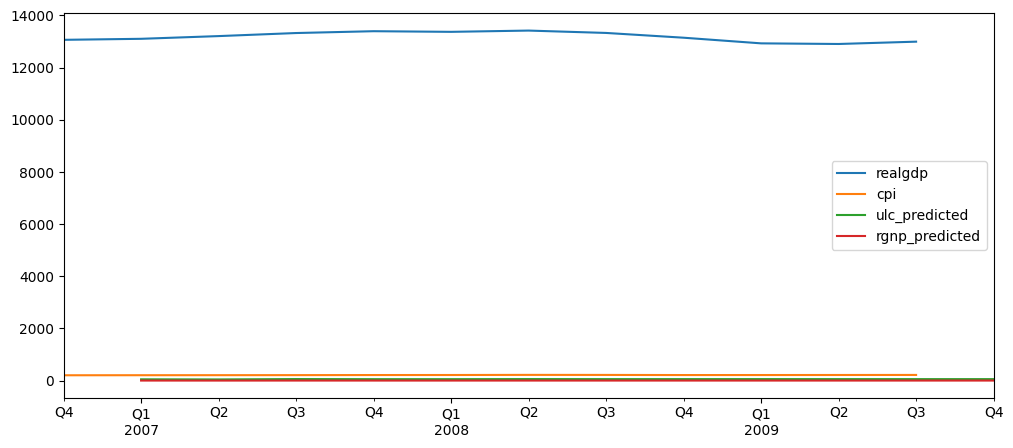

In [74]:
#Visualizing predicted vs actual values
test_vs_pred = pd.concat([test_df, predictions], axis=1)

test_vs_pred.plot(figsize=(12, 5))


In [76]:
#Model Evaluation
from sklearn.metrics import mean_squared_error
import math
from statistics import mean


In [77]:
#Calculate RMSE for realgdp
rmse_realgdp = math.sqrt(mean_squared_error(
    predictions['realgdp_predicted'],
    test_df['realgdp']
))

print("Mean value of realgdp is: {}. Root Mean Squared Error is: {}"
      .format(mean(test_df['realgdp']), rmse_realgdp))


Mean value of realgdp is: 13178.568416666667. Root Mean Squared Error is: 13125.773962359648


In [78]:
#Calculate RMSE for realgdp
rmse_cpi = math.sqrt(mean_squared_error(
    predictions['cpi_predicted'],
    test_df['cpi']
))

print("Mean value of cpi is: {}. Root Mean Squared Error is: {}"
      .format(mean(test_df['cpi']), rmse_cpi))


Mean value of cpi is: 211.97125. Root Mean Squared Error is: 211.2832262812689


we built VAR MODEL for 2 variables similarly we should also do same process and find predictions and rmse for all other variables too